## Lectura 10-1:  Selección de variables y creación de modelos


En la lectura  anterior vimos cómo la correlación entre variables predictoras puede tener efectos indeseables en los modelos. Utilizamos factores de inflación de la varianza para evaluar la gravedad de los problemas de colinealidad causados por estas correlaciones. También vimos cómo el ajuste de un modelo más pequeño, omitiendo algunos de los predictores correlacionados, da como resultado un modelo que ya no sufre problemas de colinealidad. Pero, ¿cómo elegir este modelo más pequeño?

En esta lectura discutiremos varios *criterios* y *procedimientos* para elegir un "buen" modelo entre muchos.



## Criterios de calidad

Hasta ahora, hemos visto criterios como $R^2$ y $\text{RMSE}$ para evaluar la calidad del ajuste. Sin embargo, ambos tienen un defecto fatal. Al aumentar el tamaño de un modelo, es decir, añadiendo predictores, que en el peor de los casos no puede mejorar. Es imposible añadir un predictor a un modelo y hacer $R^2$ o $\text{RMSE}$ peor. Eso significa que, si tuviéramos que utilizar cualquiera de estos para elegir entre los modelos, que * siempre* simplemente elegir el modelo más grande. Con el tiempo, estaríamos simplemente ajustando al ruido.

Esto indica que necesitamos un criterio de calidad que tenga en cuenta el tamaño del modelo, ya que preferimos modelos pequeños que se ajusten bien. Estamos dispuestos a sacrificar una pequeña cantidad de "bondad de ajuste" para obtener un modelo más pequeño. (Aquí utilizamos "bondad de ajuste" para referirnos simplemente a la distancia que separa los datos del modelo; cuanto más pequeños sean los errores, mejor. A menudo, en estadística, la bondad de ajuste puede tener un significado más preciso). Examinaremos tres criterios que hacen esto explícitamente: $\text{AIC}$, $\text{BIC}$ y $R^2$ ajustado. También estudiaremos uno, el $\text{RMSE}$ validado cruzadamente, que considera implícitamente el tamaño del modelo.



### Criterio de información de Akaike

El primer criterio que discutiremos es el Criterio de Información de Akaike, o $\text{AIC}$ para abreviar. (Tenga en cuenta que, cuando *Akaike* introdujo por primera vez esta métrica, se llamaba simplemente *Criterio de Información de Akaike*. La *A* ha cambiado de significado a lo largo de los años).

Recordemos que la log-verosimilitud maximizada de un modelo de regresión puede ser escrito como

$$\log L(\boldsymbol{\hat{\beta}}, \hat{\sigma}^2) = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log\left(\frac{\text{RSS}}{n}\right) - \frac{n}{2},$$

donde $\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i) ^ 2$ y $\boldsymbol{\hat{\beta}}$ y $\hat{\sigma}^2$ se eligieron para maximizar la probabilidad.

Entonces podemos definir $\text{AIC}$ como

$$\text{AIC} = -2 \log L(\boldsymbol{\hat{\beta}}, \hat{\sigma}^2) + 2p = n + n \log(2\pi) + n \log\left(\frac{\text{RSS}}{n}\right) + 2p,$$

que es una medida de la calidad del modelo. Cuanto menor sea el $\text{AIC}$, mejor. Para ver por qué, vamos a hablar de los dos componentes principales de $\text{AIC}$, la **probabilidad** (que mide la "bondad de ajuste") y la **penalización** (que es una función del tamaño del modelo).

La parte de probabilidad de $\text{AIC}$ viene dada por

$$ -2 \log L(\boldsymbol{\hat{\beta}}, \hat{\sigma}^2) = n + n \log(2\pi) + n \log\left(\frac{\text{RSS}}{n}\right).$$

En aras de la comparación de modelos, el único término aquí que va a cambiar es $n \log\left(\frac{\text{RSS}}{n}\right)$, que es una función de $\text{RSS}$. El

$$ n + n \log(2\pi)$$

serán constantes en todos los modelos aplicados a los mismos datos. Por lo tanto, cuando un modelo se ajusta bien, es decir, tiene un $\text{RSS}$ bajo, entonces este componente de probabilidad será pequeño.

Del mismo modo, podemos discutir el componente de penalización de $\text{AIC}$ que es,

$$ 2p, $$

donde $p$ es el número de parámetros $\beta$ del modelo. Llamamos a esto una penalización, porque es grande cuando $p$ es grande, pero buscamos encontrar un $\text{AIC}$ pequeño.

Por lo tanto, un buen modelo, es decir, uno con un pequeño $\text{AIC}$, tendrá un buen equilibrio entre el ajuste bien, y el uso de un pequeño número de parámetros. Para comparar modelos

$$\text{AIC} = n\log\left(\frac{\text{RSS}}{n}\right) + 2p$$

es una expresión suficiente, ya que $n + n \log(2\pi)$ es la misma en todos los modelos para cualquier conjunto de datos en particular.



### Criterio de información bayesiano

El Criterio de Información Bayesiano, o $\text{BIC}$, es similar al $\text{AIC}$, pero tiene una penalización mayor. El $\text{BIC}$ también cuantifica la compensación entre un modelo que se ajusta bien y el número de parámetros del modelo, sin embargo, para un tamaño de muestra razonable, generalmente elige un modelo más pequeño que el $\text{AIC}$. De nuevo, para la selección del modelo, utilice el
modelo con el menor $\text{BIC}$.

$$\text{BIC} = -2 \log L(\boldsymbol{\hat{\beta}}, \hat{\sigma}^2) + \log(n) p = n + n\log(2\pi) + n\log\left(\frac{\text{RSS}}{n}\right) + \log(n)p.$$

Nótese que la penalización $\text{AIC}$ fue

$$ 2p, $$

mientras que para $\text{BIC}$, la penalización es

$$\log(n) p.$$

Así, para cualquier conjunto de datos donde $log(n) > 2$ la penalización $\text{BIC}$ será mayor que la penalización $\text{AIC}$, por lo que $\text{BIC}$ probablemente preferirá un modelo más pequeño.

Tenga en cuenta que a veces la pena se considera una expresión general de la forma

$k \cdot p.$$

Entonces, para $\text{AIC}$ $k = 2$, y para $\text{BIC}$ $k = \log(n)$.

Para comparar modelos

$$\text{BIC} = n\log\left(\frac{\text{RSS}}{n}\right) + \log(n)p$$

es de nuevo una expresión suficiente, ya que $n + n \log(2\pi)$ es el mismo en todos los modelos para cualquier conjunto de datos en particular.



### R-cuadrado ajustado

Recordemos,

$$ R^2 = 1 - \frac{\text{SSE}}{\text{SST}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}.$$

Ahora definimos

$$R_a^2 = 1 - \frac{\text{SSE}/(n-p)}{\text{SST}/(n-1)} = 1 - \left(  \frac{n-1}{n-p} \right)(1-R^2)$$

que denominamos $R^2$ ajustado.

A diferencia de $R^2$, que nunca puede reducirse al añadir predictores, $R^2$ ajustado penaliza de forma efectiva los predictores adicionales y puede reducirse al añadir predictores. Al igual que $R^2$, cuanto mayor sea, mejor.



### RMSE de validación cruzada

Cada una de las tres métricas anteriores utiliza explícitamente $p$, el número de parámetros, en sus cálculos. Por lo tanto, todas ellas limitan explícitamente el tamaño de los modelos elegidos cuando se utilizan para comparar modelos.

Ahora introduciremos brevemente el **sobreajuste** y la **validación cruzada**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1234)

def make_poly_data(sample_size=11):
    x = np.arange(0, sample_size)
    y = 3 + x + 4 * x**2 + np.random.normal(loc=0, scale=20, size=sample_size)
    return pd.DataFrame({'x': x, 'y': y})


In [2]:
poly_data = make_poly_data()


Aquí hemos generado datos donde la media de $Y$ es una función cuadrática de un único predictor $x$, concretamente,

$$Y = 3 + x + 4 x ^ 2 + \epsilon.$$

Ahora ajustaremos dos modelos a estos datos, uno que tiene la forma correcta, cuadrática, y otro que es grande, que incluye términos de hasta octavo grado inclusive.


In [3]:
# fit_quad model
X_quad = np.column_stack((poly_data.x, poly_data.x**2))
X_quad = sm.add_constant(X_quad)
fit_quad = sm.OLS(poly_data.y, X_quad).fit()

In [4]:
# fit_big model
X_big = np.column_stack([poly_data.x**i for i in range(1, 9)])
X_big = sm.add_constant(X_big)
fit_big = sm.OLS(poly_data.y, X_big).fit()

A continuación, representamos gráficamente los datos y los resultados de los dos modelos.


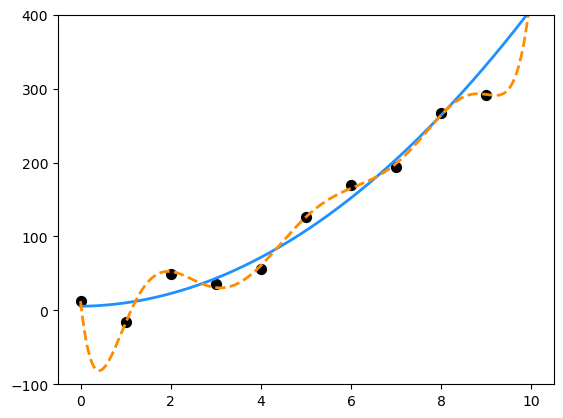

In [5]:
# Plotting
plt.scatter(poly_data.x, poly_data.y, c='black', s=50)
xplot = np.linspace(0, 10, 1000)
X_quad_plot = np.column_stack((xplot, xplot**2))
X_quad_plot = sm.add_constant(X_quad_plot)
plt.plot(xplot, fit_quad.predict(X_quad_plot), color='dodgerblue', linewidth=2)

X_big_plot = np.column_stack([xplot**i for i in range(1, 9)])
X_big_plot = sm.add_constant(X_big_plot)
plt.plot(xplot, fit_big.predict(X_big_plot), color='darkorange', linestyle='dashed', linewidth=2)
plt.ylim(-100, 400)
plt.show()


Podemos ver que la curva azul sólida modela estos datos bastante bien. La curva naranja discontinua se ajusta mejor a los puntos, cometiendo errores más pequeños, sin embargo es poco probable que esté modelando correctamente la verdadera relación entre $x$ e $y$. Se está ajustando al ruido aleatorio. Este es un ejemplo de **sobreajuste**.

Vemos que el modelo más grande tiene efectivamente una menor $\text{RMSE}$.


In [6]:
rmse_quad = np.sqrt(np.mean(fit_quad.resid ** 2))

In [7]:
print(rmse_quad)

21.256664920063006


In [8]:
rmse_big = np.sqrt(np.mean(fit_big.resid ** 2))
print(rmse_big)

3.2385425384641273



Para corregirlo, introduciremos la validación cruzada. Definimos el RMSE validado de forma cruzada como

$$\text{RMSE}_{\text{LOOCV}} = \sqrt{\frac{1}{n} \sum_{i=1}^n e_{[i]}^2}.$$

Los $e_{[i]}$ son el residuo de la observación $i$ésima, cuando esa observación **no** se utiliza para ajustar el modelo.

$$e_{[i]} = y_{i} - \hat{y}_{[i]}$$

Es decir, el valor ajustado se calcula como

$$ \hat{y}_{[i]} = \boldsymbol{x}_i ^ \top \hat{\beta}_{[i]}$$

donde $\hat{\beta}_{[i]}$ son los coeficientes estimados cuando se elimina la $i$ésima observación del conjunto de datos.

En general, para realizar este cálculo, tendríamos que ajustar el modelo $n$ veces, una vez con cada posible observación eliminada. Sin embargo, para la validación cruzada sin exclusión y los modelos lineales, la ecuación puede reescribirse como

$$\text{RMSE}_{\text{LOOCV}} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left(\frac{e_{i}}{1-h_{i}}\right)^2},$$

donde $h_i$ son los apalancamientos y $e_i$ son los residuos habituales. Esto es genial, porque ahora podemos obtener el LOOCV $\text{RMSE}$ ¡ajustando sólo un modelo! En la práctica, la validación cruzada de 5 o 10 pliegues es mucho más popular. Por ejemplo, en la validación cruzada de 5 pliegues, el modelo se ajusta 5 veces, cada vez dejando fuera una quinta parte de los datos, y luego prediciendo sobre esos valores. Dejaremos el examen en profundidad de la validación cruzada para un curso de aprendizaje automático, y simplemente utilizaremos LOOCV aquí.

Vamos a calcular LOOCV $\text{RMSE}$ para ambos modelos, a continuación, discutir *por qué* queremos hacerlo. Primero escribimos una función que calcula el LOOCV $\text{RMSE}$ como se define utilizando la fórmula abreviada para modelos lineales.


In [9]:
# Calculate LOOCV RMSE
def calc_loocv_rmse(model):
    X = model.model.exog  # This ensures that X is aligned with the model.
    hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
    loocv_resid = model.resid / (1 - np.diagonal(hat_matrix))
    loocv_rmse = np.sqrt(np.mean(loocv_resid ** 2))
    return loocv_rmse


A continuación, calcula la métrica para ambos modelos.


In [10]:
print(calc_loocv_rmse(fit_quad))
print(calc_loocv_rmse(fit_big))


32.96049393106976
433.798844282442



Ahora vemos que el modelo cuadrático tiene un LOOCV mucho menor $\text{RMSE}$, por lo que preferiríamos este modelo cuadrático. Esto se debe a que el modelo grande tiene *severely* over-fit los datos. Dejando un solo punto de datos fuera y ajustando el modelo grande, el ajuste resultante es muy diferente al ajuste utilizando todos los datos. Por ejemplo, dejemos fuera el tercer punto de datos y ajustemos ambos modelos, luego grafiquemos el resultado.


In [11]:
# Models with 3rd row removed
poly_data_removed = poly_data.drop(2)
X_quad_removed = np.column_stack((poly_data_removed.x, poly_data_removed.x**2))
X_quad_removed = sm.add_constant(X_quad_removed)
fit_quad_removed = sm.OLS(poly_data_removed.y, X_quad_removed).fit()

X_big_removed = np.column_stack([poly_data_removed.x**i for i in range(1, 9)])
X_big_removed = sm.add_constant(X_big_removed)
fit_big_removed = sm.OLS(poly_data_removed.y, X_big_removed).fit()

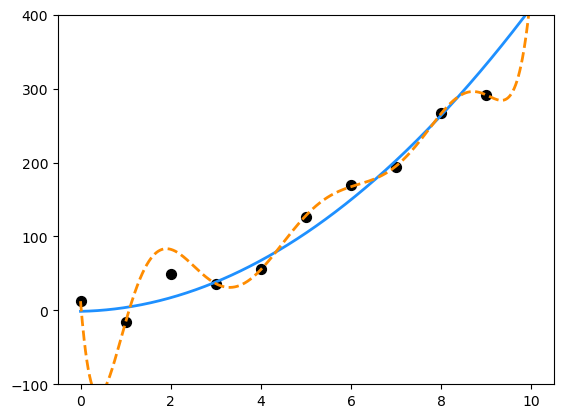

In [12]:
# Plotting models with 3rd row removed
plt.scatter(poly_data.x, poly_data.y, c='black', s=50)
plt.plot(xplot, fit_quad_removed.predict(X_quad_plot), color='dodgerblue', linewidth=2)
plt.plot(xplot, fit_big_removed.predict(X_big_plot), color='darkorange', linestyle='dashed', linewidth=2)
plt.ylim(-100, 400)
plt.show()


Vemos que, en promedio, la línea azul continua del modelo cuadrático tiene errores similares a los anteriores. Ha cambiado muy ligeramente. Sin embargo, la línea naranja discontinua para el modelo grande, tiene un error enorme en el punto que se eliminó y es muy diferente del ajuste anterior.

Este es el propósito de la validación cruzada. Al evaluar cómo se ajusta el modelo a los puntos que no se utilizaron para realizar la regresión, nos hacemos una idea de lo bien que funcionará el modelo para futuras observaciones. Evalúa lo bien que funciona el modelo en general, no simplemente en los datos observados.



## Procedimientos de selección

Ya hemos visto una serie de criterios de calidad de los modelos, pero ahora tenemos que abordar qué modelos considerar. La selección de modelos implica tanto un criterio de calidad como un procedimiento de búsqueda.


In [13]:
import faraway.utils
import faraway.datasets.seatpos

In [14]:
# cargar base de datos de ejemplo

seatpos = faraway.datasets.seatpos.load()
seatpos.head(20)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
0,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
1,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
2,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
3,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
4,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
5,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150
6,30,137,165.7,164.6,87.7,32.5,35.6,36.2,-164.750
7,28,192,185.3,182.7,96.9,35.8,39.9,43.1,-270.920
8,23,150,167.6,165.0,91.4,29.4,35.5,33.4,-151.780
9,29,120,161.2,158.7,85.2,26.6,31.0,32.8,-113.880


In [15]:
# Fit the initial model with all predictors
X = sm.add_constant(seatpos.drop(columns='hipcenter'))
hipcenter_mod = sm.OLS(seatpos['hipcenter'], X).fit()
print(hipcenter_mod.summary())
print(hipcenter_mod.params)

                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     7.940
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.31e-05
Time:                        09:57:58   Log-Likelihood:                -186.73
No. Observations:                  38   AIC:                             391.5
Df Residuals:                      29   BIC:                             406.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        436.4321    166.572      2.620      0.0


Volvamos a los datos `seatpos` del paquete `faraway`. Consideremos ahora sólo los modelos con términos de primer orden, es decir, sin interacciones ni polinomios. Hay *ocho* predictores en este modelo. Así que si consideramos todos los modelos posibles, que van desde el uso de 0 predictores, a los ocho predictores, hay

$$\sum_{k = 0}^{p - 1} {{p - 1} \choose {k}} = 2 ^ {p - 1} = 2 ^ 8 = 256$$

modelos posibles.

Si tuviéramos 10 o más predictores, ¡ya estaríamos considerando más de 1.000 modelos! Por este motivo, a menudo buscamos entre los posibles modelos de forma inteligente, pasando por alto algunos modelos que probablemente no se consideren buenos. Consideraremos tres procedimientos de búsqueda: hacia atrás, hacia delante y por pasos.



### Búsqueda hacia atrás

Los procedimientos de selección hacia atrás comienzan con todos los posibles predictores del modelo y, a continuación, consideran cómo afectará la eliminación de un único predictor a una métrica elegida. Intentémoslo con los datos de `seatpos`. 

No hay una función incorporada en ninguno de los paquetes para hacer este procedimiento, a continuación se presenta una función que realiza la búsqueda hacia atrás usando como criterio de calidad el $\text{AIC}$.

In [16]:
import numpy as np
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.base import BaseEstimator, RegressorMixin


En el código anterior hemos cargado un nuevo paquete, se trata de `mlxtend` que es una librería que contiene utilidades de algunos pasos de algoritmos de aprendizaje de máquina que se vuelven repetitivos y que pueden mejorar algunas de las funciones nativas de otros paquetes. Aquí lo usamos para realizar los procedimientos de selección de modelos (talvez esto sea muy fácil de hacer en otro software estadísticos como R, pero aquí la función nativa no existe como tal y tendremos que hacer un poco mas de trabajo, mi idea es proporcionales el código que es funcional en todos los sentidos y que pueden usar siempre que quieran en distintos modelos de regresión, yo les recomiendo guardar estar funciones en un archivo personal de utilidades)

In [17]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.base import clone
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

class SMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, sm_model=None):
        self.sm_model = sm_model
        
    def fit(self, X, y):
        if self.sm_model is None:
            self.sm_model_ = sm.OLS(y, sm.add_constant(X)).fit()
        else:
            # Clone the model to make sure the original isn't fit again
            cloned_model = clone(self.sm_model)
            self.sm_model_ = cloned_model.fit(sm.add_constant(X), y)
        return self
    
    def predict(self, X):
        return self.sm_model_.predict(sm.add_constant(X))
    
    def get_params(self, deep=True):
        return {'sm_model': self.sm_model}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def aic_scorer(self, estimator, X, y):
        return -1 * estimator.sm_model_.aic  # we multiply by -1 because SequentialFeatureSelector tries to maximize the score

    def bic_scorer(self, estimator, X, y):
        return -1 * estimator.sm_model_.bic  # we multiply by -1 because SequentialFeatureSelector tries to maximize the score


def select_features_using_criterion(X, y, criterion='aic', forward=True,floating=False):
    sm_model = SMWrapper()

    if criterion == 'aic':
        scorer = sm_model.aic_scorer
    elif criterion == 'bic':
        scorer = sm_model.bic_scorer
    else:
        raise ValueError("Invalid criterion. Choose 'aic' or 'bic'")

    sfs = SFS(sm_model, 
              k_features=(1, X.shape[1]), 
              forward=forward, 
              floating=False, 
              scoring=scorer, 
              cv=0)
    sfs = sfs.fit(X, y)
    return sfs


In [18]:
# Asumiendo que seatpos es tu DataFrame
X = seatpos.drop('hipcenter', axis=1)
y = seatpos['hipcenter']

# Select features using AIC
sfs_result_aic = select_features_using_criterion(X, y, criterion='aic', forward=False,floating=False)

# Features selected based on AIC
selected_features_aic = X.columns[list(sfs_result_aic.k_feature_idx_)]
print(f"Selected Features based on AIC: {selected_features_aic}")


Selected Features based on AIC: Index(['Age', 'HtShoes', 'Leg'], dtype='object')


In [19]:
# Adjust a full model using only the selected features
X_selected = X[selected_features_aic]
hipcenter_mod_step_aic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_step_aic.summary())


                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     24.22
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.44e-08
Time:                        09:57:58   Log-Likelihood:                -187.05
No. Observations:                  38   AIC:                             382.1
Df Residuals:                      34   BIC:                             388.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.2137    102.808      4.438      0.0

In [20]:
# Extract AIC and calculate BIC manually
n = hipcenter_mod.nobs  # Number of observations
p = hipcenter_mod.df_model + 1  # Number of parameters, including the intercept
log_likelihood = hipcenter_mod.llf  # Log-likelihood of the model

aic = -2 * log_likelihood + 2 * p
bic = -2 * log_likelihood + np.log(n) * p

print('Calculated AIC:', aic)
print('Model AIC:', hipcenter_mod.aic)

print('Calculated BIC:', bic)
print('Model BIC:', hipcenter_mod.bic)

Calculated AIC: 391.4633508941793
Model AIC: 391.4633508941793
Calculated BIC: 406.2016263317168
Model BIC: 406.2016263317168


In [21]:
hipcenter_mod_step_aic.params

const      456.213654
Age          0.599833
HtShoes     -2.302255
Leg         -6.829746
dtype: float64


También podríamos buscar entre los posibles modelos de forma inversa utilizando $\text{BIC}$.


In [22]:
# Select features using BIC
sfs_result_bic = select_features_using_criterion(X, y, criterion='bic', forward=False)

# Features selected based on BIC
selected_features_bic = X.columns[list(sfs_result_bic.k_feature_idx_)]
print(f"Selected Features based on BIC: {selected_features_bic}")

# Adjust a full model using only the selected features
X_selected = X[selected_features_bic]
hipcenter_mod_step_bic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_step_bic.summary())


Selected Features based on BIC: Index(['HtShoes'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     62.51
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.21e-09
Time:                        09:57:58   Log-Likelihood:                -189.65
No. Observations:                  38   AIC:                             383.3
Df Residuals:                      36   BIC:                             386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------


El procedimiento es exactamente el mismo, excepto que en cada paso buscamos mejorar el $\text{BIC}$



In [23]:
hipcenter_mod_step_bic.params

const      565.592659
HtShoes     -4.262091
dtype: float64


Observamos que este modelo es *más pequeño*, tiene menos predictores, que el modelo elegido por $\text{AIC}$, que es lo que cabría esperar. Tenga en cuenta también que, si bien ambos modelos son diferentes, ninguno utiliza tanto `Ht` y `HtShoes` que están muy correlacionados.

Podemos utilizar la información de la función `summary()` para comparar sus valores $R^2$ ajustados. Observe que cualquiera de los modelos seleccionados funciona mejor que el modelo completo original.


In [24]:
# Comparing adjusted R squared values
print(hipcenter_mod.rsquared_adj)
print(hipcenter_mod_step_aic.rsquared_adj)
print(hipcenter_mod_step_bic.rsquared_adj)

0.6000854694116375
0.653142656197544
0.6244148827346013



También podemos calcular el LOOCV $\text{RMSE}$ para ambos modelos seleccionados, así como para el modelo completo.


In [25]:
# Calculating LOOCV RMSE (esta función ya la definimos antes)
def calc_loocv_rmse(model):
    X = model.model.exog  # This ensures that X is aligned with the model.
    hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
    loocv_resid = model.resid / (1 - np.diagonal(hat_matrix))
    loocv_rmse = np.sqrt(np.mean(loocv_resid ** 2))
    return loocv_rmse

print(calc_loocv_rmse(hipcenter_mod))
print(calc_loocv_rmse(hipcenter_mod_step_aic))
print(calc_loocv_rmse(hipcenter_mod_step_bic))

44.44563802375208
37.58473291770462
37.40564442622142



Vemos que preferiríamos el modelo elegido mediante $\text{BIC}$ si utilizamos LOOCV $\text{RMSE}$ como nuestra métrica.



### Búsqueda hacia delante

La selección hacia adelante es exactamente lo contrario de la selección hacia atrás. Aquí le decimos a `Python` que empiece con un modelo sin predictores, es decir `hipcenter ~ 1`, entonces en cada paso `Python` intentará añadir un predictor hasta que encuentre un buen modelo o alcance `centro de cadera ~ Edad + Peso + HtZapatos + Ht + Sentado + Brazo + Muslo + Pierna`.


In [26]:
# Select features using BIC
sfs_result_aic_f = select_features_using_criterion(X, y, criterion='aic', forward=True)

# Features selected based on BIC
selected_features_aic_f = X.columns[list(sfs_result_aic_f.k_feature_idx_)]
print(f"Selected Features based on BIC: {selected_features_aic_f}")

# Adjust a full model using only the selected features
X_selected = X[selected_features_aic_f]
hipcenter_mod_forw_aic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_forw_aic.summary())

Selected Features based on BIC: Index(['Age', 'Ht', 'Leg'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     24.24
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.43e-08
Time:                        09:57:58   Log-Likelihood:                -187.04
No. Observations:                  38   AIC:                             382.1
Df Residuals:                      34   BIC:                             388.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

La función que he implementado en  `Python` utiliza $\text{AIC}$ como su métrica de calidad . 

Podemos hacer la misma modificación que la última vez para utilizar en su lugar $\text{BIC}$ con selección hacia delante.


In [27]:
# Select features using BIC
sfs_result_bic_f = select_features_using_criterion(X, y, criterion='bic', forward=True)

# Features selected based on BIC
selected_features_bic_f = X.columns[list(sfs_result_bic_f.k_feature_idx_)]
print(f"Selected Features based on BIC: {selected_features_bic_f}")

# Adjust a full model using only the selected features
X_selected = X[selected_features_bic_f]
hipcenter_mod_forw_bic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_forw_bic.summary())

Selected Features based on BIC: Index(['Ht'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     63.53
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.83e-09
Time:                        09:57:58   Log-Likelihood:                -189.45
No. Observations:                  38   AIC:                             382.9
Df Residuals:                      36   BIC:                             386.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------


Podemos comparar el $R^2$ ajustado de los dos modelos seleccionados, así como su $\text{RMSE}$ LOOCV Los resultados son muy similares a los obtenidos mediante la selección hacia atrás, aunque los modelos no son exactamente iguales.


In [28]:
hipcenter_mod.rsquared_adj


0.6000854694116375

In [29]:

hipcenter_mod_forw_aic.rsquared_adj


0.6533055366110565

In [30]:

hipcenter_mod_forw_bic.rsquared_adj


0.6282373894826558

In [31]:
calc_loocv_rmse(hipcenter_mod)


44.44563802375208

In [32]:

calc_loocv_rmse(hipcenter_mod_forw_aic)



37.625157585910145

In [33]:
calc_loocv_rmse(hipcenter_mod_forw_bic)

37.25109728478036


### Búsqueda por pasos

La búsqueda paso a paso comprueba tanto el avance como el retroceso en cada paso. Considera la adición de cualquier variable que no esté actualmente en el modelo, así como la eliminación de cualquier variable que esté actualmente en el modelo.

Aquí realizamos la búsqueda por pasos utilizando $\text{AIC}$ como métrica. Comenzamos con el modelo `hipcenter ~ 1` y la búsqueda hasta `centro de cadera ~ Edad + Peso + HtShoes + Ht + Sentado + Brazo + Muslo + Pierna`. Observe que en muchos de los pasos, algunas filas empiezan por `-`, mientras que otras empiezan por `+`.


In [36]:
# Select features using BIC
sfs_result_both_f = select_features_using_criterion(X, y, criterion='aic', forward=True, floating=True)

# Features selected based on BIC
selected_features_both_f = X.columns[list(sfs_result_both_f.k_feature_idx_)]
print(f"Selected Features based on BIC: {selected_features_both_f}")

# Adjust a full model using only the selected features
X_selected = X[selected_features_both_f]
hipcenter_mod_both_aic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_both_aic.summary())

Selected Features based on BIC: Index(['Age', 'Ht', 'Leg'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     24.24
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.43e-08
Time:                        09:58:30   Log-Likelihood:                -187.04
No. Observations:                  38   AIC:                             382.1
Df Residuals:                      34   BIC:                             388.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------


Podríamos volver a utilizar $\text{BIC}$ como métrica.


In [38]:
# Select features using BIC
sfs_result_both_f_bic = select_features_using_criterion(X, y, criterion='bic', forward=True, floating=True)

# Features selected based on BIC
selected_features_both_f_bic = X.columns[list(sfs_result_both_f_bic.k_feature_idx_)]
print(f"Selected Features based on BIC: {selected_features_both_f_bic}")

# Adjust a full model using only the selected features
X_selected = X[selected_features_both_f_bic]
hipcenter_mod_both_bic = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Print the model summary
print(hipcenter_mod_both_bic.summary())

Selected Features based on BIC: Index(['Ht'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     63.53
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.83e-09
Time:                        09:58:51   Log-Likelihood:                -189.45
No. Observations:                  38   AIC:                             382.9
Df Residuals:                      36   BIC:                             386.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------


Las comparaciones ajustadas $R^2$ y LOOCV $\text{RMSE}$ son similares a las anteriores y posteriores, lo que no es en absoluto sorprendente, ya que algunos de los modelos seleccionados son los mismos que antes.


In [39]:
hipcenter_mod.rsquared

0.6865534760253376

In [40]:
hipcenter_mod_both_aic.rsquared

0.6814158985074573

In [41]:
hipcenter_mod_both_bic.rsquared

0.6382850276047463

In [42]:
print(calc_loocv_rmse(hipcenter_mod))
print(calc_loocv_rmse(hipcenter_mod_both_aic))
print(calc_loocv_rmse(hipcenter_mod_both_bic))

44.44563802375208
37.625157585910145
37.25109728478036



### Búsqueda exhaustiva

Las búsquedas hacia atrás, hacia delante y por pasos son útiles, pero tienen un problema obvio. Al no comprobar todos los modelos posibles, a veces pasan por alto el mejor modelo posible. Con un número extremadamente grande de predictores, a veces esto es necesario, ya que comprobar todos los modelos posibles llevaría mucho tiempo, incluso con los ordenadores actuales.

Sin embargo, con un conjunto de datos de tamaño razonable, no es demasiado difícil comprobar todos los modelos posibles. Para ello, utilizaremos la función `ExhaustiveFeatureSelector()` del paquete `mlxtend` de `Python`.


In [43]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import matplotlib.pyplot as plt

# Assuming seatpos is your DataFrame
X = seatpos.drop('hipcenter', axis=1)
y = seatpos['hipcenter']

# Define the model
sm_model = SMWrapper()

efs = EFS(sm_model, 
          min_features=1,
          max_features=X.shape[1], 
          scoring='neg_mean_squared_error',
          print_progress=True,
          cv=0)

efs = efs.fit(X, y)
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)


Features: 255/255

Best accuracy score: -1085.84
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7)
Best subset (corresponding names): ('Age', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg')


In [44]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
254,"(0, 1, 2, 3, 4, 5, 6, 7)",[-1085.8364079047815],-1085.836408,"(Age, Weight, HtShoes, Ht, Seated, Arm, Thigh,...",NaN,0.0,NaN
250,"(0, 1, 2, 4, 5, 6, 7)",[-1085.9683566079034],-1085.968357,"(Age, Weight, HtShoes, Seated, Arm, Thigh, Leg)",NaN,0.0,NaN
252,"(0, 2, 3, 4, 5, 6, 7)",[-1086.073071567894],-1086.073072,"(Age, HtShoes, Ht, Seated, Arm, Thigh, Leg)",NaN,0.0,NaN
237,"(0, 2, 4, 5, 6, 7)",[-1086.2605637725326],-1086.260564,"(Age, HtShoes, Seated, Arm, Thigh, Leg)",NaN,0.0,NaN
249,"(0, 1, 2, 3, 5, 6, 7)",[-1086.5901656539493],-1086.590166,"(Age, Weight, HtShoes, Ht, Arm, Thigh, Leg)",NaN,0.0,NaN
...,...,...,...,...,...,...,...
33,"(5, 6)",[-2029.811290062231],-2029.81129,"(Arm, Thigh)",NaN,0.0,NaN
1,"(1,)",[-2043.7773373912266],-2043.777337,"(Weight,)",NaN,0.0,NaN
6,"(6,)",[-2253.3848949042167],-2253.384895,"(Thigh,)",NaN,0.0,NaN
5,"(5,)",[-2278.2685835615866],-2278.268584,"(Arm,)",NaN,0.0,NaN


In [56]:
# Extract models for each subset
all_models = []
for idx in efs.subsets_:
    X_sub = X.iloc[:, list(efs.subsets_[idx]['feature_idx'])]
    model = sm.OLS(y, sm.add_constant(X_sub)).fit()
    all_models.append(model)

print(all_models[0].summary())

                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.582
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.217
Time:                        10:00:09   Log-Likelihood:                -207.96
No. Observations:                  38   AIC:                             419.9
Df Residuals:                      36   BIC:                             423.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -192.9645     24.302     -7.940      0.0


Usando `best_feature_names_` nos da el mejor modelo, según $neg_mean_squared_error$, para un modelo de cada tamaño posible, en este caso, que van de uno a ocho predictores. Por ejemplo, el mejor modelo con cuatro predictores ($p = 5$) utilizaría `Edad`, `HtZapatos`, `Muslo` y `Pierna`.


In [46]:
# Calculate RSS and Adjusted R^2 for each model
rss = [model.ssr for model in all_models]
print(rss)



[126097.56407078005, 77663.53882086661, 48105.38441661299, 47615.79324780125, 61247.41628906701, 86574.20617534031, 85628.62600636024, 50070.9628991935, 68922.99928714373, 45434.04964306016, 45262.28508705717, 60364.32690032101, 60472.14753872091, 76714.2837836853, 46176.34875315023, 47947.824315011836, 47419.932233639905, 59479.243686141264, 72750.31582232233, 67788.91032322388, 49890.20882440744, 47590.03809691491, 48021.08546909509, 48046.78886299168, 48052.721108576356, 45066.560944843535, 47514.22962984801, 47540.01235943727, 47611.16342312447, 44834.69380438051, 57711.214026767426, 56726.291357248556, 46791.591538507346, 77132.82902236478, 50050.04173672554, 48617.13692315454, 45433.00353802825, 45262.03521245436, 57277.21806892544, 54219.00472129215, 57963.26554735053, 45534.17496128101, 45249.907764407755, 44877.56328665762, 44354.03356609099, 45076.751776148376, 41957.79193040662, 44777.44061814211, 44353.68903943072, 45070.478072506434, 41938.08901039699, 50883.15307064926, 5


Podemos obtener el ${RSS}$ para cada uno de estos modelos utilizando `$rss``. Obsérvese que son decrecientes, ya que los modelos van de pequeños a grandes.



In [47]:
adj_r2 = [model.rsquared_adj for model in all_models]
print(adj_r2)

[0.015487165049047125, 0.3936381615275577, 0.6244148827346013, 0.6282373894826558, 0.5218078327799887, 0.3240676948567376, 0.331450357794726, 0.6090685335924584, 0.44650549977473253, 0.6351363570870259, 0.6365157331743202, 0.5152369558101907, 0.5143710891041222, 0.38393664521052673, 0.6291752341062156, 0.6149491848785993, 0.6191884862261008, 0.5223447238463617, 0.4157697704136666, 0.45561293866723707, 0.599350630631211, 0.6178224304718158, 0.6143608523004378, 0.6141544380801336, 0.6141067984628932, 0.6380875196229224, 0.6184312195556633, 0.6182241682204623, 0.6176527809789993, 0.6399495568000131, 0.5365431003363574, 0.5444526412205941, 0.6242344523422108, 0.38057546693766275, 0.5980670730548134, 0.6095741888486818, 0.6244137214297077, 0.6258270851115066, 0.5264997797611946, 0.551781466659798, 0.5208283515200802, 0.623577355893686, 0.6259273404925221, 0.629005443762259, 0.6333333676096, 0.6273587891791154, 0.653142656197544, 0.6298331394358851, 0.6333362157480924, 0.627410652732485, 0.6


Para averiguar qué modelo tiene el mayor $R^2$ ajustado podemos utilizar la función `np.argmax`.


In [48]:
# best rsquared of the models and its index and the model

print(max(adj_r2))
print(np.argmax(adj_r2))
print(all_models[np.argmax(adj_r2)].summary())

0.6533055366110565
50
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     24.24
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.43e-08
Time:                        09:58:52   Log-Likelihood:                -187.04
No. Observations:                  38   AIC:                             382.1
Df Residuals:                      34   BIC:                             388.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.1976    100.9


A continuación, podemos extraer los predictores de ese modelo  `print(all_models[np.argmax(adj_r2)].summary())`



Ahora vamos a calcular $\text{AIC}$ y $\text{BIC}$$ para cada uno de los modelos con el mejor $\text{RSS}$. Para ello, necesitaremos tanto $n$ como el $p$ para el mayor modelo posible.


In [55]:

# Derive AIC and BIC values for each model
n = len(y)
aic_values = [model.aic for model in all_models]
bic_values = [model.bic for model in all_models]



A continuación, podemos extraer los predictores del modelo con la mejor
$\text{AIC}$.


In [53]:
# extract the best model based on AIC and BIC
print(min(aic_values))
print(min(bic_values))
print(all_models[np.argmin(aic_values)].summary())
print(all_models[np.argmin(bic_values)].summary())

382.08114451971556
386.18117826555755
                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     24.24
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.43e-08
Time:                        09:59:24   Log-Likelihood:                -187.04
No. Observations:                  38   AIC:                             382.1
Df Residuals:                      34   BIC:                             388.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4

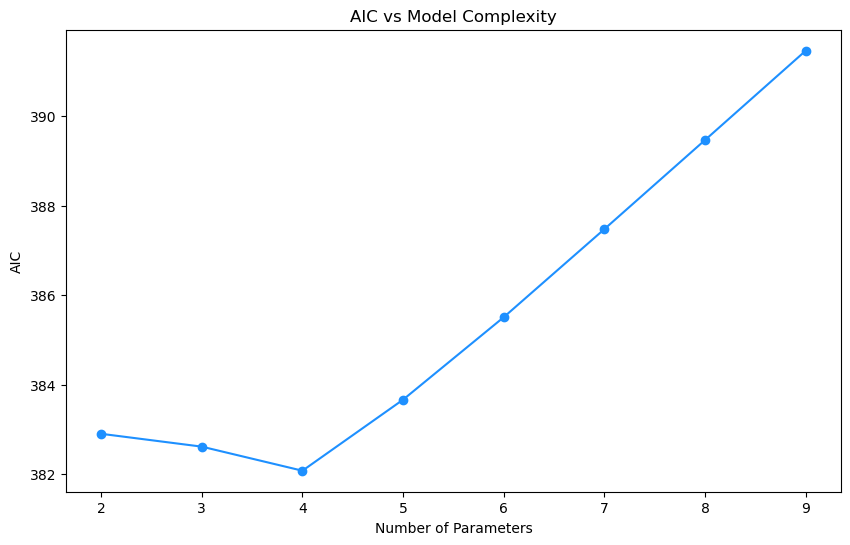

In [59]:
# Extract parameter counts for each model
p_values = [model.df_model + 1 for model in all_models]

if len(p_values) != len(aic_values):
    raise ValueError("p_values and aic_values must have the same length")

# Create a dictionary to store the best AIC for each parameter count
best_aic_per_p = {}

# Update dictionary with best AIC values for each parameter count
for p, aic in zip(p_values, aic_values):
    if p not in best_aic_per_p or aic < best_aic_per_p[p]:
        best_aic_per_p[p] = aic

# Extract unique parameter counts and their corresponding best AIC values
unique_p_values = list(best_aic_per_p.keys())
unique_aic_values = list(best_aic_per_p.values())

# Plot AIC vs Model Complexity with unique values
plt.figure(figsize=(10, 6))
plt.plot(unique_p_values, unique_aic_values, '-o', color="dodgerblue")
plt.xlabel('Number of Parameters')
plt.ylabel('AIC')
plt.title('AIC vs Model Complexity')
plt.show()


In [57]:
# Assuming aic_values contains the AIC values of all the models in all_models

# Create a dictionary to store the best AIC for each parameter count
best_aic_per_p = {}

# Update dictionary with best AIC values for each parameter count
for p, aic in zip(p_values, aic_values):
    if p not in best_aic_per_p or aic < best_aic_per_p[p]:
        best_aic_per_p[p] = aic

# Extract unique parameter counts and their corresponding best AIC values
unique_p_values = list(best_aic_per_p.keys())
unique_aic_values = list(best_aic_per_p.values())

# Plot AIC vs Model Complexity with unique values
plt.figure(figsize=(10, 6))
plt.plot(unique_p_values, unique_aic_values, '-o', color="dodgerblue")
plt.xlabel('Number of Parameters')
plt.ylabel('AIC')
plt.title('AIC vs Model Complexity')
plt.show()


NameError: name 'p_values' is not defined


## Términos de orden superior

Hasta ahora sólo hemos permitido términos de primer orden en nuestros modelos. Volvamos al conjunto de datos `autompg` para explorar los términos de orden superior.


In [60]:

# Read data frame from the web
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
autompg = pd.read_csv(url, sep="\s+", header=None, comment="\t", quotechar="\"", na_values=["?"])

# Assign headers to the dataframe
autompg.columns = ["mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name"]

# Remove rows with missing 'hp' data
autompg = autompg[autompg['hp'].notna()]

# Remove 'plymouth reliant'
autompg = autompg[autompg['name'] != "plymouth reliant"]

# Create row names based on the engine, year, and name
autompg.index = autompg['cyl'].astype(str) + " cylinder " + autompg['year'].astype(str) + " " + autompg['name']

# Drop the 'name' column
autompg.drop('name', axis=1, inplace=True)

# Convert horsepower from object to numeric
autompg['hp'] = pd.to_numeric(autompg['hp'], errors='coerce')

# Create a dummy variable for foreign vs. domestic cars. Domestic = 1.
autompg['domestic'] = (autompg['origin'] == 1).astype(int)

# Remove 3 and 5 cylinder cars
autompg = autompg[~autompg['cyl'].isin([3, 5])]

# Change 'cyl' to a category variable
autompg['cyl'] = autompg['cyl'].astype('category')

# Display the structure (similar to str in R)
print(autompg.info())


<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 8 cylinder 70 chevrolet chevelle malibu to 4 cylinder 82 chevy s-10
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       383 non-null    float64 
 1   cyl       383 non-null    category
 2   disp      383 non-null    float64 
 3   hp        383 non-null    float64 
 4   wt        383 non-null    float64 
 5   acc       383 non-null    float64 
 6   year      383 non-null    int64   
 7   origin    383 non-null    int64   
 8   domestic  383 non-null    int32   
dtypes: category(1), float64(5), int32(1), int64(2)
memory usage: 25.9+ KB
None



Recordemos que tenemos dos variables factoriales, `cyl` y `doméstica`. La variable `cyl` tiene tres niveles, mientras que la variable `doméstico` sólo tiene dos. Por lo tanto, la variable `cyl` se codificará utilizando dos variables ficticias, mientras que la variable `doméstica` sólo necesitará una. Tendremos esto en cuenta más adelante.


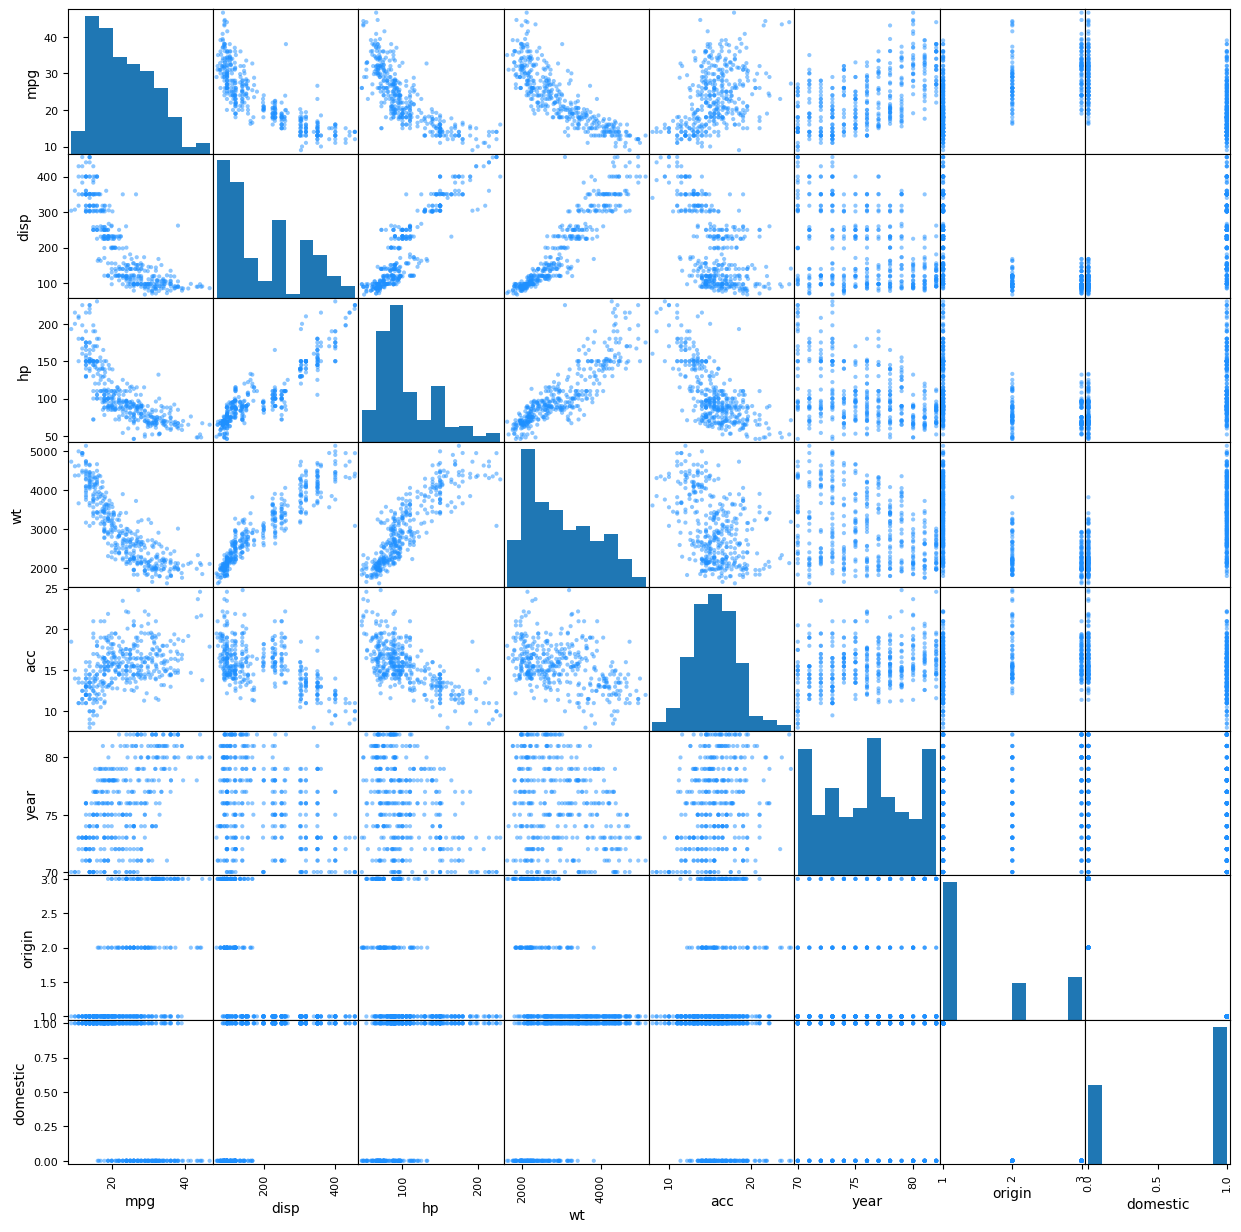

In [61]:
# Scatterplot matrix
pd.plotting.scatter_matrix(autompg, color='dodgerblue', figsize=(15, 15))
plt.show()


Utilizaremos el gráfico `pairs()` para determinar qué variables pueden beneficiarse de una relación cuadrática con la respuesta. También consideraremos todas las posibles interacciones bidireccionales. No consideraremos ninguna de tres órdenes o superior. Por ejemplo, no consideraremos la interacción entre los términos de primer orden y los términos cuadráticos añadidos.

Así que ahora, vamos a ajustar este modelo bastante grande. Usaremos una respuesta logarítmica. Vamos a crear términos cuadraticos y todas las posibles interacciones entre dos variables con los datos originales del modelo.


In [62]:
import statsmodels.formula.api as smf

In [63]:
# Adding squared features
autompg['disp_sq'] = autompg['disp'] ** 2
autompg['hp_sq'] = autompg['hp'] ** 2
autompg['wt_sq'] = autompg['wt'] ** 2
autompg['acc_sq'] = autompg['acc'] ** 2

# Formula for the full model
formula = 'np.log(mpg) ~ cyl + disp + hp + wt + acc + year + domestic + \
           disp_sq + hp_sq + wt_sq + acc_sq + \
           (cyl + disp + hp + wt + acc + year + domestic)**2'
           
autompg_big_mod = smf.ols(formula, data=autompg).fit()

In [64]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 8 cylinder 70 chevrolet chevelle malibu to 4 cylinder 82 chevy s-10
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       383 non-null    float64 
 1   cyl       383 non-null    category
 2   disp      383 non-null    float64 
 3   hp        383 non-null    float64 
 4   wt        383 non-null    float64 
 5   acc       383 non-null    float64 
 6   year      383 non-null    int64   
 7   origin    383 non-null    int64   
 8   domestic  383 non-null    int32   
 9   disp_sq   383 non-null    float64 
 10  hp_sq     383 non-null    float64 
 11  wt_sq     383 non-null    float64 
 12  acc_sq    383 non-null    float64 
dtypes: category(1), float64(9), int32(1), int64(2)
memory usage: 46.0+ KB


In [65]:
print(autompg_big_mod.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.76e-167
Time:                        10:12:01   Log-Likelihood:                 355.70
No. Observations:                 383   AIC:                            -633.4
Df Residuals:                     344   BIC:                            -479.4
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.8615      1.94


Creemos que es bastante improbable que realmente necesitemos todos estos términos. Hay bastantes.

In [66]:
# Display number of coefficients
print(len(autompg_big_mod.params))


40


A seguir, vamos a utilizar la selección de modelos para reducir este modelo. Diferente de la función  que hemos propuesto encima, aquí se debe especificar el modelo menor y el modelo mayor que se quiere probar. En este caso, el modelo menor es el modelo sin ningún término de orden superior, es decir, el modelo lineal. El modelo mayor es el modelo que acabamos de ajustar.

In [74]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.base import clone
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

class SMWrapper2(BaseEstimator, RegressorMixin):
    def __init__(self, big_model, small_model):
        self.big_model = big_model
        self.small_model = small_model
        self.model = None
        self._wrap_attrs = {
            'aic': 'evaluate_aic',
            'bic': 'evaluate_bic',
            'mse': 'evaluate_mse'
        }
    
    def fit(self, X, y):
        # Note: This is a dummy method, as the model is already fit outside the class
        return self
    
    def predict(self, X):
        # Use the 'predict' method of the underlying statsmodels model
        return self.model.predict(X)
    
    def evaluate_aic(self, estimator, X, y):
        endog, exog = y, sm.add_constant(X)
        self.model = sm.OLS(endog, exog).fit()
        return -self.model.aic
    
    def evaluate_bic(self, estimator, X, y):
        endog, exog = y, sm.add_constant(X)
        self.model = sm.OLS(endog, exog).fit()
        return -self.model.bic
    
    def evaluate_mse(self, estimator, X, y):
        predictions = self.predict(X)
        mse = ((predictions - y) ** 2).mean()
        return -mse

def select_features_using_models(big_model, small_model, criterion='aic', forward=True):
    X = big_model.model.exog
    y = big_model.model.endog

    sm_model = SMWrapper2(big_model=big_model, small_model=small_model)
    num_features_small_model = len(small_model.params)
    num_features_big_model = len(big_model.params)

    if criterion == 'aic':
        scorer = sm_model.evaluate_aic
    elif criterion == 'bic':
        scorer = sm_model.evaluate_bic
    else:
        raise ValueError("Invalid criterion. Choose 'aic' or 'bic'")

    sfs = SFS(sm_model, 
              k_features=(num_features_small_model, min(num_features_big_model, X.shape[1])), 
              forward=forward, 
              floating=False, 
              scoring=scorer,   
              cv=0)
    sfs = sfs.fit(X, y)
    return sfs

# Define the small model
autompg_small_mod = smf.ols('np.log(mpg) ~ 1', data=autompg).fit()

sfs_result = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='aic', forward=True)

sfs_results = pd.DataFrame.from_dict(sfs_result.get_metric_dict()).T
print(sfs_results)

In [75]:
# Define the small model
autompg_small_mod = smf.ols('np.log(mpg) ~ 1', data=autompg).fit()

# This part assumes that the function 'select_features_using_models' is correctly defined elsewhere in your code
sfs_result = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='aic', forward=True)

sfs_results = pd.DataFrame.from_dict(sfs_result.get_metric_dict()).T
print(sfs_results)

# Determine the optimal subset of features
best_feature_idx = sfs_result.k_feature_idx_
print(f"Best features by index: {best_feature_idx}")

# Create DataFrames from arrays (assuming X_big, y_big, and columns are correctly defined elsewhere in your code)
X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names if isinstance(autompg_big_mod.model.endog_names, str) else 'response')

# Extract the optimal features.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx]
X_optimal_df = X_big_df[best_feature_names]

# Fit the model
optimal_model = sm.OLS(y_big_df, X_optimal_df).fit()

print(optimal_model.summary())

                                          feature_idx             cv_scores  \
1                                                (9,)  [315.69912748970955]   
2                                             (9, 15)   [543.3015193542258]   
3                                         (9, 15, 23)   [580.2073106351925]   
4                                     (9, 15, 23, 31)   [597.1823335937511]   
5                                 (9, 15, 23, 29, 31)   [608.9545173593897]   
6                             (9, 15, 23, 24, 29, 31)   [614.7656873727124]   
7                          (6, 9, 15, 23, 24, 29, 31)   [621.4372952765893]   
8                      (6, 9, 13, 15, 23, 24, 29, 31)   [623.1970272187843]   
9                   (6, 8, 9, 13, 15, 23, 24, 29, 31)   [625.6653788323961]   
10              (6, 8, 9, 13, 14, 15, 23, 24, 29, 31)   [629.4667596303166]   
11          (6, 8, 9, 13, 14, 15, 23, 24, 29, 31, 32)   [635.4514184726497]   
12      (6, 8, 9, 13, 14, 15, 23, 24, 29, 31, 32, 35

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'columns' is not defined

In [70]:


# Define the small model
autompg_small_mod = smf.ols('np.log(mpg) ~ 1', data=autompg).fit()

sfs_result = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='aic', forward=True)

sfs_results = pd.DataFrame.from_dict(sfs_result.get_metric_dict()).T
print(sfs_results)

# Determina el subconjunto de características óptimo
best_feature_idx = sfs_result.k_feature_idx_
print(f"Best features by index: {best_feature_idx}")



X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names)


# Extraer las características óptimas.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx]
X_optimal_df = X_big_df[best_feature_names]

# Ajustar el modelo
optimal_model = sm.OLS(y_big_df, X_optimal_df).fit()

print(optimal_model.summary())


                                          feature_idx             cv_scores  \
1                                                (9,)  [315.69912748970955]   
2                                             (9, 15)   [543.3015193542258]   
3                                         (9, 15, 23)   [580.2073106351925]   
4                                     (9, 15, 23, 31)   [597.1823335937511]   
5                                 (9, 15, 23, 29, 31)   [608.9545173593897]   
6                             (9, 15, 23, 24, 29, 31)   [614.7656873727124]   
7                          (6, 9, 15, 23, 24, 29, 31)   [621.4372952765893]   
8                      (6, 9, 13, 15, 23, 24, 29, 31)   [623.1970272187843]   
9                   (6, 8, 9, 13, 15, 23, 24, 29, 31)   [625.6653788323961]   
10              (6, 8, 9, 13, 14, 15, 23, 24, 29, 31)   [629.4667596303166]   
11          (6, 8, 9, 13, 14, 15, 23, 24, 29, 31, 32)   [635.4514184726497]   
12      (6, 8, 9, 13, 14, 15, 23, 24, 29, 31, 32, 35

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [73]:

# Determina el subconjunto de características óptimo
best_feature_idx = sfs_result.k_feature_idx_
print(f"Best features by index: {best_feature_idx}")



X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names)


# Extraer las características óptimas.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx]
X_optimal_df = X_big_df[best_feature_names]

# Ajustar el modelo
optimal_model = sm.OLS(y_big_df, X_optimal_df).fit()

print(optimal_model.summary())

Best features by index: (0, 2, 3, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 20, 22, 23, 24, 26, 29, 30, 31, 32, 35, 37, 38, 39)


NameError: name 'columns' is not defined

Vamos a tratar de búsqueda hacia atrás con tanto $\text{AIC}$ y $\text{BIC}$ para tratar de encontrar un modelo más pequeño, más razonable.



También utilizamos $\text{BIC}$.


In [ ]:
sfs_result_bic = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='bic', forward=True)


# Determina el subconjunto de características óptimo
best_feature_idx_bic= sfs_result_bic.k_feature_idx_
print(f"Best features by index: {best_feature_idx_bic}")

if len(columns) > X_big.shape[1]:
    # Asumiendo que 'const' es el que sobra, lo eliminamos de la lista
    if 'const' in columns:
        columns.remove('const')

X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names)


# Extraer las características óptimas.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx_bic]
X_optimal_df_bic = X_big_df[best_feature_names]

# Ajustar el modelo
optimal_model_bic = sm.OLS(y_big_df, X_optimal_df_bic).fit()

print(optimal_model_bic.summary())

Best features by index: (6, 9, 15, 23, 24, 29, 31)
                                 OLS Regression Results                                
Dep. Variable:            np.log(mpg)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          3.313e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                        0.00
Time:                        01:28:18   Log-Likelihood:                          251.94
No. Observations:                 383   AIC:                                     -489.9
Df Residuals:                     376   BIC:                                     -462.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025


Si observamos los coeficientes de los dos modelos elegidos, vemos que siguen siendo bastante grandes.


In [ ]:
# number of coefficients in the full model

print(len(autompg_big_mod.params))
print(len(optimal_model.params))
print(len(optimal_model_bic.params))

40
26
7



Aunque los modelos seleccionados son mucho más pequeños que el modelo completo original. Obsérvese  que los modelos resultantes NO respetan la jerarquía!!! Vemos que hay tambien problemas de variables con multicolinealidad. 


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.base import clone
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def has_higher_order_term(columns, feature):
    """Checks if there is a higher order term present in the columns for a given feature."""
    for col in columns:
        # Ensuring col is a string
        col = str(col)
        # Check if feature name is part of a higher order term name
        if feature in col and (col.endswith('^2') or ':' in col):
            return True
    return False

def is_higher_order_or_interaction(feature_name):
    return '^' in feature_name or ':' in feature_name


def get_main_effects(feature_name):
    if ':' in feature_name:
        return feature_name.split(':')
    elif '^' in feature_name:
        base, power = feature_name.split('^')
        return [base]
    else:
        return []

def adjust_for_hierarchy(X, original_X):
    columns = list(X.columns)
    for feature in columns:
        if is_higher_order_or_interaction(feature):
            main_effects = get_main_effects(feature)
            for effect in main_effects:
                if effect not in columns:
                    X[effect] = original_X[effect]
                    columns.append(effect)
        if has_higher_order_term(columns, feature):
            X[feature] = original_X[feature]
    return X


class SMWrapper3(BaseEstimator, RegressorMixin):
    def __init__(self, big_model, small_model):
        self.big_model = big_model
        self.small_model = small_model
        self.model = None
        self._wrap_attrs = {
    'evaluate_aic': 'evaluate_aic',
    'evaluate_bic': 'evaluate_bic',
    'evaluate_mse': 'evaluate_mse'
}

    
    def fit(self, X, y):
        # Note: This is a dummy method, as the model is already fit outside the class
        return self
    
    def predict(self, X):
        # Use the 'predict' method of the underlying statsmodels model
        return self.model.predict(X)
    
    def evaluate_aic(self, estimator, X, y):
        X = pd.DataFrame(X)
        X.insert(0, 'const', 1.0)
        # Ensure column names are strings
        X.columns = X.columns.astype(str)

        columns = list(X.columns)
        X = adjust_for_hierarchy(X, X)

        self.selected_features_ = columns
        self.model = sm.OLS(y, X[columns]).fit()
        return -self.model.aic

    def evaluate_bic(self, estimator, X, y):
        X = pd.DataFrame(X)
        X.insert(0, 'const', 1.0)
        # Ensure column names are strings
        X.columns = X.columns.astype(str)

        columns = list(X.columns)
        X = adjust_for_hierarchy(X, X)

        self.selected_features_ = columns
        self.model = sm.OLS(y, X[columns]).fit()
        return -self.model.bic

    def evaluate_mse(self, estimator, X, y):
        predictions = self.predict(X)
        mse = ((predictions - y) ** 2).mean()
        return -mse

def select_features_using_models(big_model, small_model, criterion='aic', forward=True):
    X = pd.DataFrame(big_model.model.exog)
    y = big_model.model.endog

    sm_model = SMWrapper3(big_model=big_model, small_model=small_model)
    num_features_small_model = len(small_model.params)
    num_features_big_model = len(big_model.params)


    
    # Define the scorer based on the selected criterion
    if criterion == 'aic':
        scorer = sm_model.evaluate_aic
    elif criterion == 'bic':
        scorer = sm_model.evaluate_bic
    else:
        raise ValueError("Invalid criterion. Choose 'aic' or 'bic'")


    # Define and fit SFS with the full feature set
    sfs = SFS(sm_model, 
              k_features=(num_features_small_model, min(num_features_big_model, X.shape[1])), 
              forward=forward, 
              floating=False, 
              scoring=scorer,   
              cv=0)
    sfs = sfs.fit(X, y)
    
    # Update X to keep only the selected features
    X_selected = X.iloc[:, list(sfs.k_feature_idx_)]
    
    # Setup SFS with updated k_features for X_selected
    sfs = SFS(sm_model, 
              k_features=(1, X_selected.shape[1]), 
              forward=forward, 
              floating=False, 
              scoring=scorer,   
              cv=0)
    
    sfs = sfs.fit(X_selected, y)
    
    return sfs



In [ ]:

sfs_result_bic = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='aic', forward=True)


# Determina el subconjunto de características óptimo
best_feature_idx_bic= sfs_result_bic.k_feature_idx_
print(f"Best features by index: {best_feature_idx_bic}")

if len(columns) > X_big.shape[1]:
    # Asumiendo que 'const' es el que sobra, lo eliminamos de la lista
    if 'const' in columns:
        columns.remove('const')

X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names)


# Extraer las características óptimas.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx_bic]
X_optimal_df_bic = X_big_df[best_feature_names]

# Ajustar el modelo
autompg_mod_back_aic = sm.OLS(y_big_df, X_optimal_df_bic).fit()

print(autompg_mod_back_aic.summary())

Best features by index: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.40e-172
Time:                        08:23:47   Log-Likelihood:                 332.74
No. Observations:                 383   AIC:                            -615.5
Df Residuals:                     358   BIC:                            -516.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----

In [ ]:

sfs_result_bic = select_features_using_models(big_model=autompg_big_mod, small_model=autompg_small_mod, criterion='bic', forward=True)


# Determina el subconjunto de características óptimo
best_feature_idx_bic= sfs_result_bic.k_feature_idx_
print(f"Best features by index: {best_feature_idx_bic}")

if len(columns) > X_big.shape[1]:
    # Asumiendo que 'const' es el que sobra, lo eliminamos de la lista
    if 'const' in columns:
        columns.remove('const')

X_big_df = pd.DataFrame(X_big, columns=columns)
y_big_df = pd.Series(y_big, name=autompg_big_mod.model.endog_names)


# Extraer las características óptimas.
best_feature_names = [X_big_df.columns[i] for i in best_feature_idx_bic]
X_optimal_df_bic = X_big_df[best_feature_names]

# Ajustar el modelo
autompg_mod_back_bic = sm.OLS(y_big_df, X_optimal_df_bic).fit()

print(autompg_mod_back_bic.summary())

Best features by index: (0, 1, 2, 3, 4, 5, 6)
                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.89e-129
Time:                        08:24:00   Log-Likelihood:                 179.22
No. Observations:                 383   AIC:                            -344.4
Df Residuals:                     376   BIC:                            -316.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------



Calculando el LOOCV $\text{RMSE}$ para cada uno, vemos que el modelo elegido utilizando $\text{BIC}$ es el que mejor funciona. Esto significa que es a la vez el mejor modelo de predicción, ya que consigue el mejor LOOCV pero también el mejor modelo para la explicación, ya que también es el más pequeño. el más pequeño.


In [ ]:
calc_loocv_rmse(autompg_big_mod)


0.4605426586361027

In [ ]:

calc_loocv_rmse(autompg_mod_back_aic)


0.10160437691142798

In [ ]:

calc_loocv_rmse(autompg_mod_back_bic)

0.15499022129325363


## Explicación frente a predicción

A lo largo de este capítulo, hemos intentado encontrar modelos razonablemente "pequeños", que sean buenos para **explicar** la relación entre la respuesta y los predictores, que también tengan errores pequeños y que, por tanto, sean buenos para hacer **predicciones**.

Discutiremos más a fondo el modelo `autompg_mod_back_aic` para explicar mejor la diferencia entre utilizar modelos para *explicar* y *predicar*. Este es el modelo ajustado a los datos `autompg` que se eligió utilizando la búsqueda hacia atrás y $\text{BIC}$, que obtuvo el LOOCV $\text{RMSE}$ más bajo de los modelos que consideramos.



Observe que se trata de un modelo algo "grande", que utiliza parámetros 26, incluidos varios términos de interacción. ¿Nos importa que sea un modelo "grande"? La respuesta es, **depende**.



### Explicación

Supongamos que queremos utilizar este modelo como explicación. Tal vez seamos un fabricante de coches que intenta diseñar un vehículo que consuma menos combustible. En este caso, nos interesa saber qué variables predictoras son útiles para explicar la eficiencia del combustible del coche y cómo afectan esas variables a la eficiencia del combustible. Al comprender esta relación, podemos utilizar este conocimiento en nuestro beneficio a la hora de diseñar un coche.

Para explicar una relación, nos interesa que los modelos sean lo más pequeños posible, ya que los modelos más pequeños son fáciles de interpretar. Cuantos menos predictores, menos consideraciones tendremos que tener en cuenta en nuestro proceso de diseño. Además, cuantas menos interacciones y términos polinómicos haya, más fácil será interpretar cualquier parámetro, ya que las interpretaciones de los parámetros dependen de los parámetros que haya en el modelo.

Tenga en cuenta que los modelos *lineales* son bastante interpretables para empezar. Más adelante en su carrera de análisis de datos, verá modelos más complicados que pueden ajustarse mejor a los datos, pero son mucho más difíciles, si no imposibles de interpretar. Estos modelos no son muy útiles para explicar una relación.

Para encontrar modelos pequeños e interpretables, utilizaríamos criterios de selección que penalizan *explícitamente* los modelos más grandes, como el AIC y el BIC. En este caso seguimos obteniendo un modelo algo grande, pero mucho más pequeño que el modelo que utilizamos para iniciar el proceso de selección.



### Predicción

Supongamos que ahora, en lugar del fabricante que desea fabricar un coche, somos un consumidor que desea comprar un coche nuevo. Sin embargo, este coche en concreto es tan nuevo que no ha sido sometido a pruebas rigurosas, por lo que no estamos seguros de qué eficiencia de combustible podemos esperar. (Y, como escépticos que somos, no nos fiamos de lo que nos dice el fabricante).

En este caso, nos gustaría utilizar el modelo para ayudar a *predecir* la eficiencia de combustible de este coche basándonos en sus atributos, que son los predictores del modelo. Cuanto menores sean los errores del modelo, más confianza tendremos en su predicción. Así, para encontrar modelos de predicción, utilizaríamos criterios de selección que *implícitamente* penalizan los modelos más grandes, como LOOCV $\text{RMSE}$. Mientras el modelo no se ajuste en exceso, en realidad no nos importa lo grande que sea el modelo. Explicar la relación entre las variables no es nuestro objetivo aquí, ¡simplemente queremos saber qué tipo de eficiencia de combustible debemos esperar!

Si **sólo** nos importa la predicción, no tenemos que preocuparnos por la correlación frente a la causalidad ni por los supuestos del modelo.


Si una variable está correlacionada con la respuesta, en realidad no importa si causa un efecto en la respuesta, puede seguir siendo útil para la predicción. Por ejemplo, en niños de primaria, el número de calzado no *causa* que lean a un nivel más alto, pero podríamos utilizarlo para hacer una predicción sobre la capacidad lectora de un niño. Cuanto mayor sea su número de calzado, mejor leerán. Sin embargo, hay una variable al acecho: ¡su edad! (No envíe a sus hijos al colegio con zapatos de la talla 14, ¡no leerán mejor!).

Tampoco nos importan los supuestos del modelo. Los mínimos cuadrados son los mínimos cuadrados. Para un modelo especificado, encontrará los valores de los parámetros que minimizarán la pérdida de error al cuadrado. Sus resultados pueden ser en gran medida ininterpretables e inútiles para la inferencia, pero para la predicción nada de eso importa.

